In [ ]:
pip install seaborn

## Test for Normality

- Automatically not normal since there is a categorical data type column (weathercode (wmo code))

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('Yield_Weather.csv')
df

,Unnamed: 0,Year,Location,Production (mt),Area (ha),Yield (mt/ha),weathercode (wmo code),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),...,cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,0,1990,ZAMBOANGA DEL NORTE,41.14,91.0,0.452088,3,23.486279,86.200457,20.899235,...,70.154680,0.153233,0.435739,6.732808,144.312329,19.894932,25.227021,0.401853,151.119064,70.720548
1,1,1991,ZAMBOANGA DEL NORTE,53.28,108.0,0.493333,3,23.378607,86.403995,20.856210,...,71.524658,0.153091,0.422427,6.505616,138.691096,19.141393,25.074669,0.404063,147.845890,75.080251
2,2,1992,ZAMBOANGA DEL NORTE,71.34,114.0,0.625789,3,23.253153,86.111225,20.664014,...,66.843010,0.154016,0.430523,5.957605,143.278233,18.114481,25.086202,0.399902,149.374203,74.632628
3,3,1993,ZAMBOANGA DEL NORTE,78.88,123.0,0.641301,3,23.086187,88.171575,20.931313,...,72.979110,0.147360,0.360022,5.702637,151.702854,17.351541,24.700765,0.450554,141.238014,75.799315
4,4,1994,ZAMBOANGA DEL NORTE,85.71,128.0,0.669609,3,23.100217,88.401142,20.990674,...,76.482534,0.144709,0.352926,5.919954,154.063813,18.403128,24.679966,0.438253,139.645320,73.633562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,952,2018,TAWI-TAWI,0.00,0.0,NaN,1,25.101781,81.959703,21.787637,...,43.909932,0.164605,0.577837,13.415742,174.348288,21.051290,26.616324,0.000000,164.635959,71.210502
953,953,2019,TAWI-TAWI,0.00,0.0,NaN,1,25.174361,81.307420,21.708082,...,36.225799,0.174063,0.600727,13.434920,150.258790,20.562249,26.571689,0.000000,184.635274,65.579452
954,954,2020,TAWI-TAWI,0.00,0.0,NaN,1,25.272291,80.921790,21.740745,...,43.682491,0.165880,0.617793,12.067725,143.826617,19.564526,26.978802,0.000000,165.257628,68.485087
955,955,2021,TAWI-TAWI,0.00,0.0,NaN,1,25.110696,81.587671,21.717591,...,47.829110,0.159237,0.591193,12.753904,179.280365,20.301929,26.899030,0.000000,150.401142,73.859817


In [10]:
df.columns

Index(['Unnamed: 0', 'Year', 'Location', 'Production (mt)', 'Area (ha)',
       'Yield (mt/ha)', 'weathercode (wmo code)', 'temperature_2m (°C)',
       'relativehumidity_2m (%)', 'dewpoint_2m (°C)', 'rain (mm)',
       'surface_pressure (hPa)', 'cloudcover (%)',
       'et0_fao_evapotranspiration (mm)', 'vapor_pressure_deficit (kPa)',
       'windspeed_10m (km/h)', 'winddirection_10m (°)', 'windgusts_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)'],
      dtype='object')

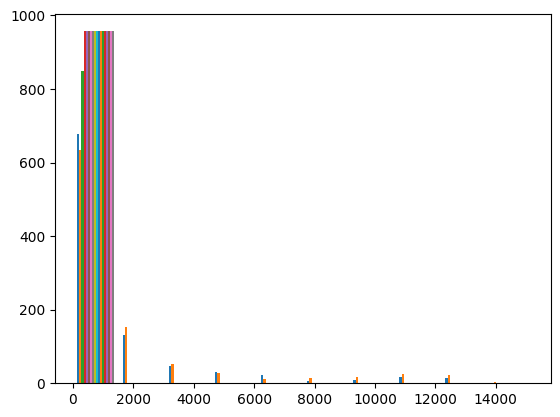

In [12]:
plt.hist(df.drop(columns=['Location', 'Year', 'Unnamed: 0', 'weathercode (wmo code)']))
plt.show()

## Outlier Detection Using Z-score value

In [16]:
df.dtypes

Unnamed: 0                             int64
Year                                   int64
Location                              object
Production (mt)                      float64
Area (ha)                            float64
Yield (mt/ha)                        float64
weathercode (wmo code)                object
temperature_2m (°C)                  float64
relativehumidity_2m (%)              float64
dewpoint_2m (°C)                     float64
rain (mm)                            float64
surface_pressure (hPa)               float64
cloudcover (%)                       float64
et0_fao_evapotranspiration (mm)      float64
vapor_pressure_deficit (kPa)         float64
windspeed_10m (km/h)                 float64
winddirection_10m (°)                float64
windgusts_10m (km/h)                 float64
soil_temperature_28_to_100cm (°C)    float64
soil_moisture_28_to_100cm (m³/m³)    float64
direct_radiation (W/m²)              float64
diffuse_radiation (W/m²)             float64
dtype: obj

In [48]:
df2 = df.drop(columns=['Location', 'Year', 'Unnamed: 0', 'weathercode (wmo code)'])
df2

,Production (mt),Area (ha),Yield (mt/ha),temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),rain (mm),surface_pressure (hPa),cloudcover (%),et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),windspeed_10m (km/h),winddirection_10m (°),windgusts_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),direct_radiation (W/m²),diffuse_radiation (W/m²)
0,41.14,91.0,0.452088,23.486279,86.200457,20.899235,0.365126,947.709498,70.154680,0.153233,0.435739,6.732808,144.312329,19.894932,25.227021,0.401853,151.119064,70.720548
1,53.28,108.0,0.493333,23.378607,86.403995,20.856210,0.292443,947.897831,71.524658,0.153091,0.422427,6.505616,138.691096,19.141393,25.074669,0.404063,147.845890,75.080251
2,71.34,114.0,0.625789,23.253153,86.111225,20.664014,0.320560,948.140301,66.843010,0.154016,0.430523,5.957605,143.278233,18.114481,25.086202,0.399902,149.374203,74.632628
3,78.88,123.0,0.641301,23.086187,88.171575,20.931313,0.413082,947.978059,72.979110,0.147360,0.360022,5.702637,151.702854,17.351541,24.700765,0.450554,141.238014,75.799315
4,85.71,128.0,0.669609,23.100217,88.401142,20.990674,0.391427,947.781906,76.482534,0.144709,0.352926,5.919954,154.063813,18.403128,24.679966,0.438253,139.645320,73.633562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0.00,0.0,NaN,25.101781,81.959703,21.787637,0.180468,970.402146,43.909932,0.164605,0.577837,13.415742,174.348288,21.051290,26.616324,0.000000,164.635959,71.210502
953,0.00,0.0,NaN,25.174361,81.307420,21.708082,0.107192,971.181427,36.225799,0.174063,0.600727,13.434920,150.258790,20.562249,26.571689,0.000000,184.635274,65.579452
954,0.00,0.0,NaN,25.272291,80.921790,21.740745,0.174499,970.776548,43.682491,0.165880,0.617793,12.067725,143.826617,19.564526,26.978802,0.000000,165.257628,68.485087
955,0.00,0.0,NaN,25.110696,81.587671,21.717591,0.244247,970.380000,47.829110,0.159237,0.591193,12.753904,179.280365,20.301929,26.899030,0.000000,150.401142,73.859817


In [28]:
df2.dtypes

Production (mt)                      float64
Area (ha)                            float64
Yield (mt/ha)                        float64
temperature_2m (°C)                  float64
relativehumidity_2m (%)              float64
dewpoint_2m (°C)                     float64
rain (mm)                            float64
surface_pressure (hPa)               float64
cloudcover (%)                       float64
et0_fao_evapotranspiration (mm)      float64
vapor_pressure_deficit (kPa)         float64
windspeed_10m (km/h)                 float64
winddirection_10m (°)                float64
windgusts_10m (km/h)                 float64
soil_temperature_28_to_100cm (°C)    float64
soil_moisture_28_to_100cm (m³/m³)    float64
direct_radiation (W/m²)              float64
diffuse_radiation (W/m²)             float64
dtype: object

In [49]:
df2['Yield (mt/ha)'] = df['Yield (mt/ha)'].fillna(0)

In [50]:
df2.isnull().values.any()

False

In [51]:
mean = np.mean(df2['Production (mt)'])
std = np.std(df2['Production (mt)'])
 
threshold = 3
outliers = []
for x in df2['Production (mt)']:
    z_score = (x - mean) / std
    if abs(z_score) > threshold:
        outliers.append(x)
print("Mean: ",mean)
print("\nStandard deviation: ",std)
print("\nOutliers  : ", outliers)

Mean:  1569.1452664576802

Standard deviation:  2686.891346634448

Outliers  :  [11117.13, 13159.67, 14373.88, 13462.18, 13056.48, 11386.97, 10703.48, 10597.11, 9990.29, 10078.15, 10121.33, 10026.37, 11718.27, 11999.41, 11997.91, 11850.15, 12723.66, 12888.9, 12570.29, 12085.42, 11796.03, 10031.99, 10706.38, 11113.98, 11660.93, 11907.61, 12213.84, 12462.98, 12199.23, 12506.3, 13224.63, 12709.82, 12207.25, 11984.85, 10875.79, 10006.93, 10785.45, 11512.57]


In [52]:
upper_limit = df2['Production (mt)'].mean() + 3*df2['Production (mt)'].std()
lower_limit = df2['Production (mt)'].mean() - 3*df2['Production (mt)'].std()

df2['Production (mt)'] = np.where(
    df2['Production (mt)']>upper_limit,
    upper_limit,
    np.where(
        df2['Production (mt)']<lower_limit,
        lower_limit,
        df2['Production (mt)']
    )
)

In [53]:
df2['Production (mt)'].describe()

count     957.000000
mean     1485.842950
std      2377.530043
min         0.000000
25%        24.470000
50%       320.340000
75%      1780.810000
max      9634.034038
Name: Production (mt), dtype: float64